<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication_4X/blob/main/GQtest_cluster_data(y_hat)_multi_delta_(_1_2)_n120_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication_4X/multiplication_delta_-1.2'

In [4]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_-1.2_n120.csv')

In [5]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,74.639714,74.166851,69.531693,22.785938,-0.008880,251.115316,251.097285,0.018031
1,0.0,1.0,90.127230,85.992474,38.983028,43.519071,-0.055617,268.566186,268.614163,-0.047977
2,0.0,2.0,42.337226,37.595931,53.291185,75.393595,0.018477,218.636414,218.621449,0.014965
3,0.0,3.0,20.299377,36.258143,98.399197,52.998622,-0.072171,217.883168,217.936003,-0.052835
4,0.0,4.0,30.602613,73.021899,68.366938,82.194288,0.090959,264.276697,264.193976,0.082720
...,...,...,...,...,...,...,...,...,...,...
119995,999.0,115.0,67.564259,77.387063,60.277468,65.491813,-0.091509,280.629094,280.718665,-0.089570
119996,999.0,116.0,97.994420,55.783705,37.675152,64.866107,0.084908,266.404291,266.334065,0.070226
119997,999.0,117.0,81.408864,47.622992,84.367713,52.960643,0.053687,276.413899,276.361121,0.052778
119998,999.0,118.0,98.142626,97.860399,33.000741,31.929999,0.024665,270.958430,270.941732,0.016698


In [6]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    74.639714  74.166851  69.531693  22.785938 -0.008880  251.115316   
      1.0    90.127230  85.992474  38.983028  43.519071 -0.055617  268.566186   
      2.0    42.337226  37.595931  53.291185  75.393595  0.018477  218.636414   
      3.0    20.299377  36.258143  98.399197  52.998622 -0.072171  217.883168   
      4.0    30.602613  73.021899  68.366938  82.194288  0.090959  264.276697   
...                ...        ...        ...        ...       ...         ...   
999.0 115.0  67.564259  77.387063  60.277468  65.491813 -0.091509  280.629094   
      116.0  97.994420  55.783705  37.675152  64.866107  0.084908  266.404291   
      117.0  81.408864  47.622992  84.367713  52.960643  0.053687  276.413899   
      118.0  98.142626  97.860399  33.000741  31.929999  0.024665  270.958430   
      119.0  41.252855  81.284048  92.782768  66.508745  0.004933  291.833350   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    251.097285  0.018031  
      1.0    268.614163 -0.047977  
      2.0    218.621449  0.014965  
      3.0    217.936003 -0.052835  
      4.0    264.193976  0.082720  
...                 ...       ...  
999.0 115.0  280.718665 -0.089570  
      116.0  266.334065  0.070226  
      117.0  276.361121  0.052778  
      118.0  270.941732  0.016698  
      119.0  291.811936  0.021414  

[120000 rows x 8 columns]

In [7]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    74.639714  74.166851  69.531693  22.785938 -0.008880  251.115316   
      1.0    90.127230  85.992474  38.983028  43.519071 -0.055617  268.566186   
      2.0    42.337226  37.595931  53.291185  75.393595  0.018477  218.636414   
      3.0    20.299377  36.258143  98.399197  52.998622 -0.072171  217.883168   
      4.0    30.602613  73.021899  68.366938  82.194288  0.090959  264.276697   
...                ...        ...        ...        ...       ...         ...   
999.0 115.0  67.564259  77.387063  60.277468  65.491813 -0.091509  280.629094   
      116.0  97.994420  55.783705  37.675152  64.866107  0.084908  266.404291   
      117.0  81.408864  47.622992  84.367713  52.960643  0.053687  276.413899   
      118.0  98.142626  97.860399  33.000741  31.929999  0.024665  270.958430   
      119.0  41.252855  81.284048  92.782768  66.508745  0.004933  291.833350   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    251.097285  0.018031  
      1.0    268.614163 -0.047977  
      2.0    218.621449  0.014965  
      3.0    217.936003 -0.052835  
      4.0    264.193976  0.082720  
...                 ...       ...  
999.0 115.0  280.718665 -0.089570  
      116.0  266.334065  0.070226  
      117.0  276.361121  0.052778  
      118.0  270.941732  0.016698  
      119.0  291.811936  0.021414  

[120000 rows x 8 columns]

In [8]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,74.639714,74.166851,69.531693,22.785938,-0.008880,251.115316,251.097285,0.018031
1,0.0,1.0,90.127230,85.992474,38.983028,43.519071,-0.055617,268.566186,268.614163,-0.047977
2,0.0,2.0,42.337226,37.595931,53.291185,75.393595,0.018477,218.636414,218.621449,0.014965
3,0.0,3.0,20.299377,36.258143,98.399197,52.998622,-0.072171,217.883168,217.936003,-0.052835
4,0.0,4.0,30.602613,73.021899,68.366938,82.194288,0.090959,264.276697,264.193976,0.082720
...,...,...,...,...,...,...,...,...,...,...
119995,999.0,115.0,67.564259,77.387063,60.277468,65.491813,-0.091509,280.629094,280.718665,-0.089570
119996,999.0,116.0,97.994420,55.783705,37.675152,64.866107,0.084908,266.404291,266.334065,0.070226
119997,999.0,117.0,81.408864,47.622992,84.367713,52.960643,0.053687,276.413899,276.361121,0.052778
119998,999.0,118.0,98.142626,97.860399,33.000741,31.929999,0.024665,270.958430,270.941732,0.016698


In [9]:
table.set_index(['rep', 'index'], inplace=True)

In [10]:
table

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    74.639714  74.166851  69.531693  22.785938 -0.008880  251.115316   
      1.0    90.127230  85.992474  38.983028  43.519071 -0.055617  268.566186   
      2.0    42.337226  37.595931  53.291185  75.393595  0.018477  218.636414   
      3.0    20.299377  36.258143  98.399197  52.998622 -0.072171  217.883168   
      4.0    30.602613  73.021899  68.366938  82.194288  0.090959  264.276697   
...                ...        ...        ...        ...       ...         ...   
999.0 115.0  67.564259  77.387063  60.277468  65.491813 -0.091509  280.629094   
      116.0  97.994420  55.783705  37.675152  64.866107  0.084908  266.404291   
      117.0  81.408864  47.622992  84.367713  52.960643  0.053687  276.413899   
      118.0  98.142626  97.860399  33.000741  31.929999  0.024665  270.958430   
      119.0  41.252855  81.284048  92.782768  66.508745  0.004933  291.833350   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    251.097285  0.018031  
      1.0    268.614163 -0.047977  
      2.0    218.621449  0.014965  
      3.0    217.936003 -0.052835  
      4.0    264.193976  0.082720  
...                 ...       ...  
999.0 115.0  280.718665 -0.089570  
      116.0  266.334065  0.070226  
      117.0  276.361121  0.052778  
      118.0  270.941732  0.016698  
      119.0  291.811936  0.021414  

[120000 rows x 8 columns]

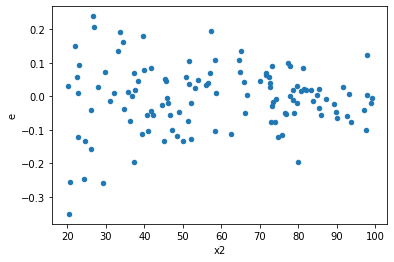

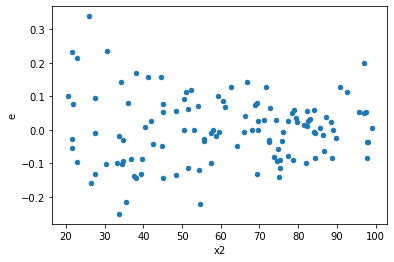

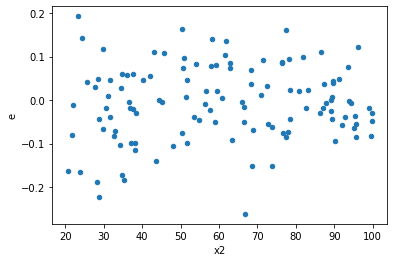

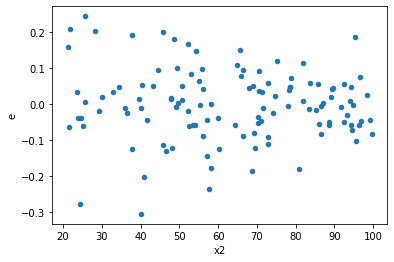

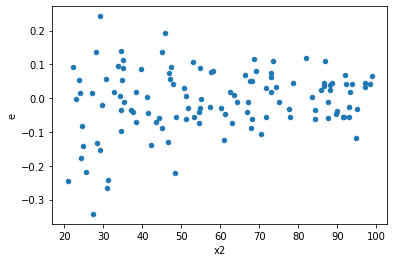

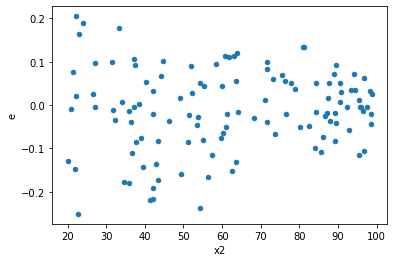

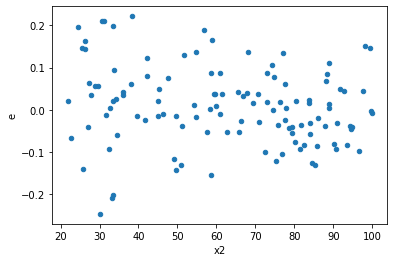

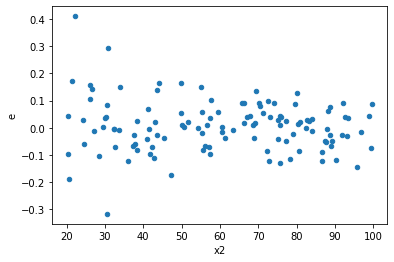

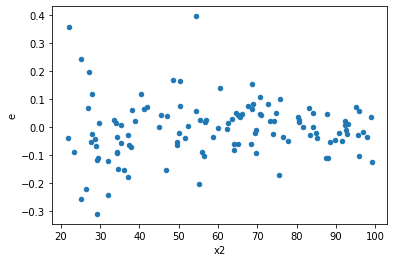

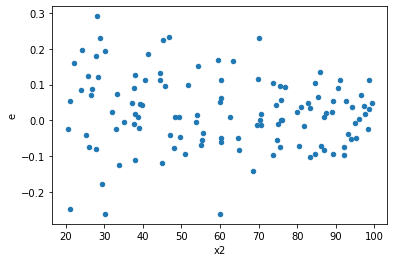

In [11]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [12]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[["y_hat"]]

    #Another important parameter is init, which defines the method initialization to use (default='k-means++').
    #k-means++ algorithm uses the seeding technique for centroid initialization which is better than the random initialization method.
    kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(x)

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = kmeans.predict(x)

    #kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    #data_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster0 = data_clusters[data_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1', 'x2', 'x3', 'x4']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # กลุ่มที่ 2
    data_cluster1 = data_clusters[data_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1', 'x2', 'x3', 'x4']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()

    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df2)))
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df2)
    p_less = 1.0-ss.f.cdf(GQ_test_clusters, df1, df2)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]
#list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less=get_result(run_replicate)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future versi

In [13]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
2.0,65.0,47.0,0.4052002711302109,0.406212789277772,0.006233850325080168,0.008642825303782383,1.3864345233010122,0.24048929779682204,0.879755351101589,0.12024464889841102,Reject001=1 : Homoscedasticity
3.0,57.0,55.0,0.4050464297361358,0.620579235289302,0.007106077714669049,0.011283258823441856,1.5878321735983645,0.08715741717564307,0.9564212914121785,0.043578708587821535,Reject001=1 : Homoscedasticity
4.0,50.0,62.0,0.33348200653386906,0.6406665811911078,0.006669640130677381,0.010333331954695286,1.54930877112343,0.1015690543526373,0.9492154728236813,0.05078452717631865,Reject001=1 : Homoscedasticity
10.0,62.0,50.0,0.4442169036170079,0.5581035051525735,0.0071647887680162566,0.01116207010305147,1.557906375813778,0.10673269130103469,0.9466336543494827,0.053366345650517344,Reject001=1 : Homoscedasticity
13.0,52.0,60.0,0.2501366520040009,0.5983653079337635,0.004810320230846172,0.009972755132229392,2.0731998398524727,0.006745388096336624,0.9966273059518317,0.003372694048168312,Reject001=0 : Heteroscedasticity
14.0,62.0,50.0,0.5692452881350429,0.4968100975652618,0.009181375615081337,0.009936201951305236,1.0822127715790237,0.7775384463923223,0.6112307768038389,0.38876922319616114,Reject001=1 : Homoscedasticity
16.0,50.0,62.0,0.3424493560397535,0.6155940508623954,0.00684898712079507,0.009928936304232184,1.4496941122995681,0.16449127749891557,0.9177543612505422,0.08224563874945778,Reject001=1 : Homoscedasticity
17.0,51.0,61.0,0.2988559854779632,0.6776868684833283,0.0058599212838816314,0.01110962079480866,1.8958651928255272,0.017136955027713396,0.9914315224861433,0.008568477513856698,Reject001=1 : Homoscedasticity
20.0,43.0,69.0,0.47151484643389197,1.244200051470243,0.010965461544974232,0.018031884803916563,1.644425520071343,0.06441675993648044,0.9677916200317598,0.03220837996824022,Reject001=1 : Homoscedasticity


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                     if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,54.0,58.0,0.832869540589314,0.27423152236468923,0.015423510010913221,0.004728129695942918,0.30655341699765054,2.1164309127585162e-05,Reject001=0 : Heteroscedasticity
1.0,56.0,56.0,0.771128981268017,0.3722980210120786,0.013770160379786017,0.006648178946644261,0.4827960432765541,0.007287239611086393,Reject001=0 : Heteroscedasticity
2.0,65.0,47.0,0.4052002711302109,0.406212789277772,0.006233850325080168,0.008642825303782383,1.3864345233010122,0.24048929779682204,Reject001=1 : Homoscedasticity
3.0,57.0,55.0,0.4050464297361358,0.620579235289302,0.007106077714669049,0.011283258823441856,1.5878321735983645,0.08715741717564307,Reject001=1 : Homoscedasticity
4.0,50.0,62.0,0.33348200653386906,0.6406665811911078,0.006669640130677381,0.010333331954695286,1.54930877112343,0.1015690543526373,Reject001=1 : Homoscedasticity
5.0,44.0,68.0,0.5328731427848112,0.45921704153481624,0.012110753245109346,0.0067531917872767095,0.5576194684673171,0.04046328639703119,Reject001=1 : Homoscedasticity
6.0,70.0,42.0,0.6172956354217654,0.3373858812346307,0.00881850907745379,0.008032997172253111,0.9109246360919454,0.71827747508532,Reject001=1 : Homoscedasticity
7.0,72.0,40.0,0.7409921848891443,0.21169173992688262,0.010291558123460338,0.005292293498172065,0.5142363706918106,0.014058098177033122,Reject001=1 : Homoscedasticity
8.0,51.0,61.0,0.7261466339973396,0.37582041115928627,0.014238169294065482,0.006160990346873545,0.43270944597080097,0.002524173516572313,Reject001=0 : Heteroscedasticity


In [15]:
result_show['Result_test'].value_counts()

Reject001=1 : Homoscedasticity      778
Reject001=0 : Heteroscedasticity    222
Name: Result_test, dtype: int64